<h2 style='color:blue' align='center'>World Leaders Image Classification<h2>

Special thanks to Debjyoti Paul (My data scientist friend at Amazon) for help with this project

In [51]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
print(" Test your jupyter file ")

 Test your jupyter file 


<h3 style='color:purple'>(1) Preprocessing: Detect face and eyes</h3>

#### When we look at any image, most of the time we identify a person using a face. An image might contain multiple faces, also the face can be obstructed and not clear. The first step in our pre-processing pipeline is to detect faces from an image. Once face is detected, we will detect eyes, if two eyes are detected then only we keep that image otherwise discard it.</h4>

#### Now how do you detect face and eyes?

We will use haar cascade from opencv for this. Here is an article on this: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html?highlight=haar

In [52]:
img = cv2.imread("E:/World_leader_classification/model/test_images/Emmanuel_Macron.jpg")
img.shape  # get shape of image

(1763, 1200, 3)

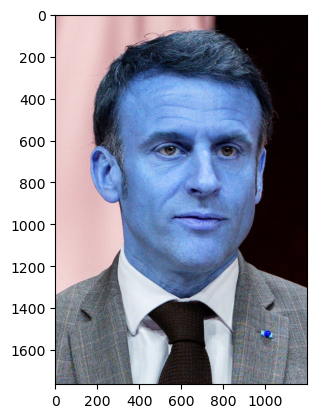

In [53]:
plt.imshow(img)

In [54]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1763, 1200)

In [5]:
gray

array([[166, 166, 165, ...,   1,   1,   1],
       [166, 168, 165, ...,   1,   1,   1],
       [163, 171, 169, ...,   1,   1,   1],
       ...,
       [121,  60,  51, ..., 143, 169, 194],
       [165, 114,  87, ..., 147, 189, 205],
       [193, 168, 142, ..., 153, 200, 206]], dtype=uint8)

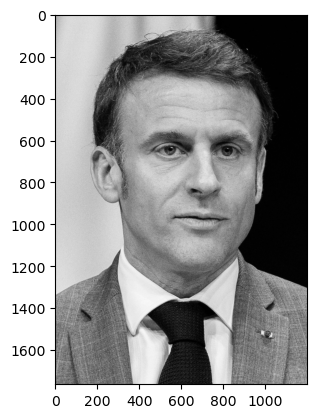

In [55]:
plt.imshow(gray, cmap='gray')

In [56]:
face_cascade = cv2.CascadeClassifier('E:/World_leader_classification/model/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('E:/World_leader_classification/model/opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces  # this will give 4D value,-> Out[16]: array([[352,  38, 233, 233]], dtype=int32)indicate { x, y, width, heght}

array([[266, 317, 832, 832]], dtype=int32)

In [57]:
# Save the value axis wise
(x,y,w,h) = faces[0]
x,y,w,h

(266, 317, 832, 832)

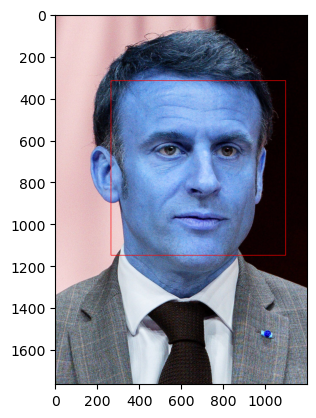

In [58]:
# Draw an red color Box on Face of image
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

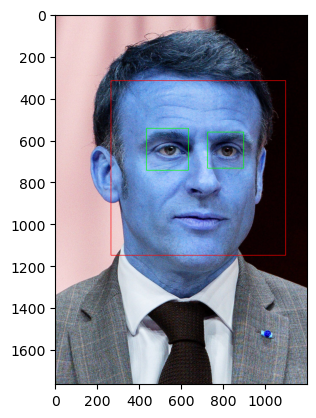

In [59]:
## Draw Box on eye image
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

<h3 style='color:purple'>(2) Preprocessing: Crop the facial region of the image</h3>

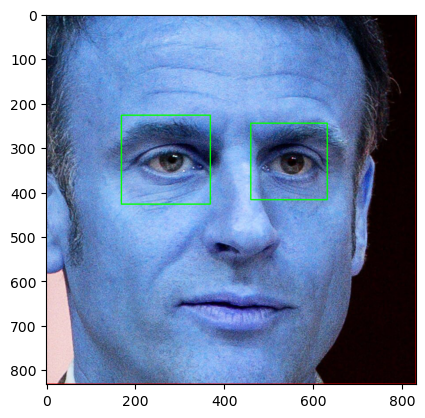

In [60]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [61]:
# get eye shape size
cropped_img = np.array(roi_color)
cropped_img.shape

(832, 832, 3)

<h3 style='color:purple'>(3) Preprocessing: Use wavelet transform as a feature for traning our model</h3>

#### In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc

### Wavelet transform

In [63]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

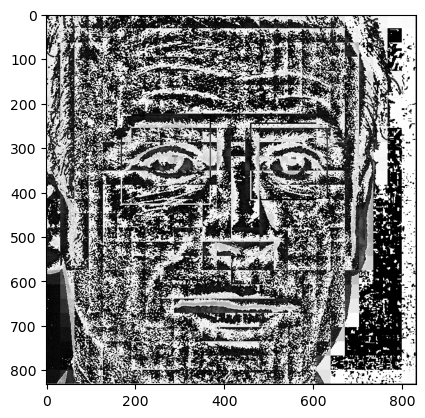

In [64]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

#### You can see above a wavelet transformed image that gives clues on facial features such as eyes, nose, lips etc. This along with raw pixel image can be used as an input for our classifier

<h3 style='color:purple'>(3) Preprocessing: Load image, detect face. If eyes >=2, then save and crop the face region</h3>

####  Lets write a python function that can take input image and returns cropped image (if face and eyes >=2 are detected)

In [65]:
### defined function for crop Face

def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

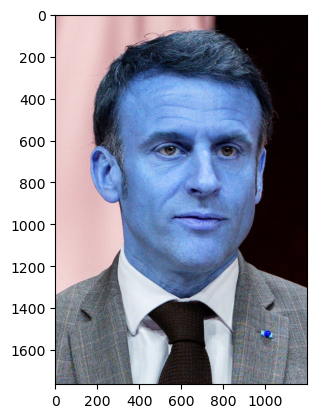

In [66]:
## original image
original_image = cv2.imread("E:/World_leader_classification/model/test_images/Emmanuel_Macron.jpg")
plt.imshow(original_image)

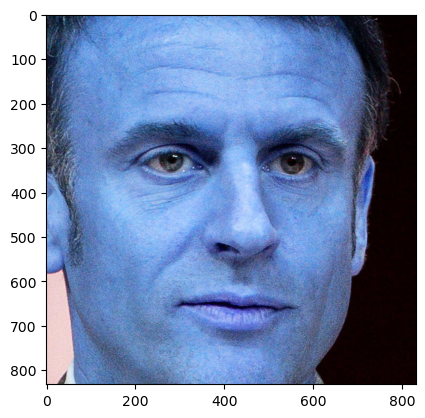

In [67]:
## Get only crop image
cropped_image = get_cropped_image_if_2_eyes("E:/World_leader_classification/model/test_images/Emmanuel_Macron.jpg")
plt.imshow(cropped_image)

**In below image face is not very clear and it doesn't have two eyes clearly visible**

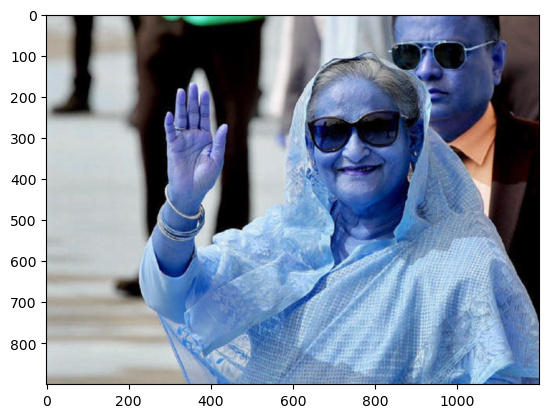

In [68]:
## original image
org_image_obstructed = cv2.imread("E:/World_leader_classification/model/test_images/Sheikh_Hasina.jpg")
plt.imshow(org_image_obstructed)

In [69]:
## Get ony nothing because this image has no face
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes("E:/World_leader_classification/model/test_images/angela_markel 3.jpg")
cropped_image_no_2_eyes

error: OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


**Above cropped_image_no_2_eyes is None which means we should ignore this image and we will not use such image for model training**

In [70]:
###   save all crop eye from in´mages in the sub folder as per serial/ label wise
## create crop folder in current directory folder
path_to_data = "E:/World_leader_classification/model/dataset/"
path_to_cr_data = "E:/World_leader_classification/model/cropped/"

In [71]:
## create python list via os , so that, can create sub folder in the mention path
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [72]:
# print the all subdirectory vaiables
img_dirs

['E:/World_leader_classification/model/dataset/Angela_Markel',
 'E:/World_leader_classification/model/dataset/Emmanuel_Macron',
 'E:/World_leader_classification/model/dataset/Justin_Trudeau',
 'E:/World_leader_classification/model/dataset/Sheikh_Hasina',
 'E:/World_leader_classification/model/dataset/Vladimir_Putin']

**Go through all images in dataset folder and create cropped images for them. There will be cropped folder inside dataset folder after you run this code**

In [73]:
# create sub crop folder in current dataset folder
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)           ## os.makedir() create folder

In [74]:
## iterarte all image directory and create folder name as per celebraty, finally crop eye from all images.
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]

     # upto here just create subfolder name.
    # Now below loop will give you crop eye image in those subfolder
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)       # get crop face image as label/ serial wise
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)             # write image
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)  ### create dictionary for label images
            count += 1

Generating cropped images in folder:  E:/World_leader_classification/model/cropped/Angela_Markel
Generating cropped images in folder:  E:/World_leader_classification/model/cropped/Emmanuel_Macron
Generating cropped images in folder:  E:/World_leader_classification/model/cropped/Justin_Trudeau
Generating cropped images in folder:  E:/World_leader_classification/model/cropped/Sheikh_Hasina
Generating cropped images in folder:  E:/World_leader_classification/model/cropped/Vladimir_Putin


### Now you should have cropped folder under datasets folder that contains cropped images

### Manually examine cropped folder and delete any unwanted images

In [75]:
### This dictinany give us all crop image
celebrity_file_names_dict = {}
###  This dictionary will use in next model, It contains model name wise dicrionary and List of all crop image.###

for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Angela_Markel': ['E:/World_leader_classification/model/cropped/Angela_Markel\\Angela_Markel1.png',
  'E:/World_leader_classification/model/cropped/Angela_Markel\\Angela_Markel10.png',
  'E:/World_leader_classification/model/cropped/Angela_Markel\\Angela_Markel11.png',
  'E:/World_leader_classification/model/cropped/Angela_Markel\\Angela_Markel12.png',
  'E:/World_leader_classification/model/cropped/Angela_Markel\\Angela_Markel13.png',
  'E:/World_leader_classification/model/cropped/Angela_Markel\\Angela_Markel14.png',
  'E:/World_leader_classification/model/cropped/Angela_Markel\\Angela_Markel15.png',
  'E:/World_leader_classification/model/cropped/Angela_Markel\\Angela_Markel16.png',
  'E:/World_leader_classification/model/cropped/Angela_Markel\\Angela_Markel17.png',
  'E:/World_leader_classification/model/cropped/Angela_Markel\\Angela_Markel18.png',
  'E:/World_leader_classification/model/cropped/Angela_Markel\\Angela_Markel19.png',
  'E:/World_leader_classification/model/cropped/A

In [76]:
### Assiagn celebratiy name into number wise
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Angela_Markel': 0,
 'Emmanuel_Macron': 1,
 'Justin_Trudeau': 2,
 'Sheikh_Hasina': 3,
 'Vladimir_Putin': 4}

### Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

In [77]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [78]:
# watch out length of List X or number of total List
len(X[0])

4096

In [79]:
# Size of each image of each list of image
len(X[0])   #  output: (raw_image 32*32*3)+(wavelet_imag 32*32)

4096

In [80]:
## watch out each image of each list of X
X[0]

array([[187],
       [118],
       [  1],
       ...,
       [244],
       [ 25],
       [ 26]], dtype=uint8)

In [31]:
## watch out each image of each list of Y
y[0]

0

In [81]:
# reshape and convert into float for assurance the correct shape (182, 4096) with float number
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(229, 4096)

### Data cleaning process is done. Now we are ready to train our model

We will use SVM with rbf kernel tuned  with heuristic finetuning

In [82]:
## import all module for createing a model
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [83]:
##  Splite train and test date
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8275862068965517

In [84]:
# check accuracy without NN model
print(classification_report(y_test, pipe.predict(X_test)))  ## check accuracy 82% without  Nueral network

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.59      0.83      0.69        12
           2       0.90      0.90      0.90        20
           3       1.00      0.50      0.67         6
           4       0.89      0.80      0.84        10

    accuracy                           0.83        58
   macro avg       0.88      0.79      0.81        58
weighted avg       0.86      0.83      0.83        58



### Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [85]:
### Use GridSearchCV to get almost good hyperparameter for model
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [86]:
# create 3 different models for SVM, Random Forest, Logistric Regression
model_params = {
    'svm': {                                                  ## use SVM model
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {                                          ## Use Random forest model
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {                                   ## Use Logistic regression
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [87]:
# check accuracy score for 3 different models and apend all score and save
scores = []
best_estimators = {}
import pandas as pd
## iterate dictionary each of models
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])            # rescale all date for each of 3 models
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)   # Cv -> cross validation for test and train data set
    clf.fit(X_train, y_train)
    scores.append({                                           ## apend all scores
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])

 ## print all score
df                                                                 

,model,best_score,best_params
0,svm,0.924538,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.760840,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.930588,{'logisticregression__C': 5}


In [88]:
##   print best estimator model ****
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=5, solver='liblinear'))])}

In [89]:
## print best estimator score for SVM
best_estimators['svm'].score(X_test,y_test)

0.8620689655172413

In [90]:
## print best estimator score for Random forest
best_estimators['random_forest'].score(X_test,y_test)

0.6724137931034483

In [91]:
## print best estimator score for Logistic regression
best_estimators['logistic_regression'].score(X_test,y_test)

0.8620689655172413

In [92]:
best_clf = best_estimators['svm']

In [93]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))

 # print confusing matrix
cm                                                        

array([[ 9,  1,  0,  0,  0],
       [ 0, 10,  0,  0,  2],
       [ 0,  2, 18,  0,  0],
       [ 0,  3,  0,  3,  0],
       [ 0,  0,  0,  0, 10]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

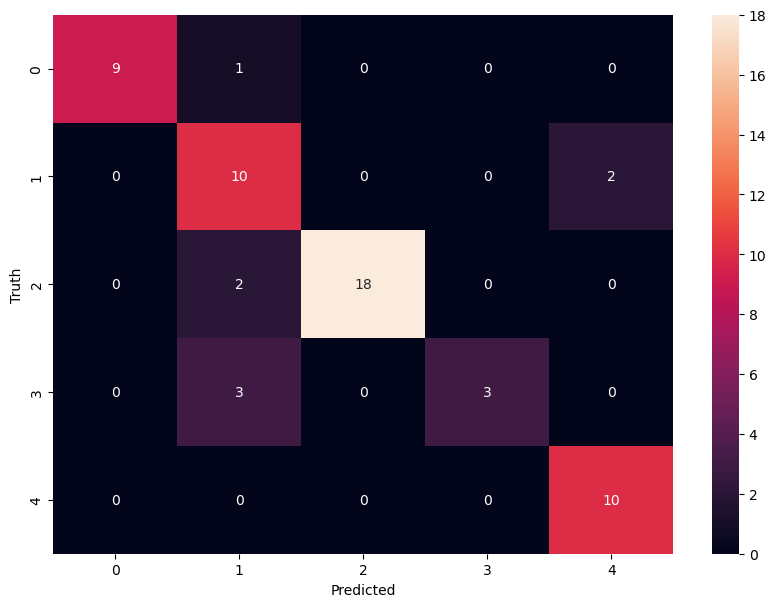

In [94]:
# plot confusing matrix via seaborn
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [95]:
# compare actualliy with confusion matrix and  below didctionary
class_dict

{'Angela_Markel': 0,
 'Emmanuel_Macron': 1,
 'Justin_Trudeau': 2,
 'Sheikh_Hasina': 3,
 'Vladimir_Putin': 4}

### Save the trained model

In [96]:
# need to install this pip for joblib->>   pip install joblib
%pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

### Save class dictionary

In [97]:
### ***********************************Save class dictionary
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))